# *Primera Entrega – Métodos De Minería De Datos En Python* #

#### Datos: Hábitos Alimentarios Y Condición Física #####

#### Ubicación de la fuente de datos: Barranquilla - Colombia, Lima - Perú, Ciudad de México - México

### Información del conjunto de datos: ###

#### El conjunto de datos seleccionado es para medir el nivel de obesidad en personas a partir de una muestra obtenida. Para la recopilación de datos se usó una encuetas online, donde los encuestados respondieron diferentes preguntas sobre sus hábitos alimenticios y su condición física. A partir de los resultados de la encuesta, se procesaron obteniendo 17 atributos o variables y 2.111 registros. Estos datos corresponden al área de salud y se cataloga el conjunto de datos como multivariado. Los datos obtenidos se componen de datos numéricos y datos continuos, podrían ser utilizados para el análisis basado en algoritmos de clasificación, predicción o segmentación. ###

Encuesta
Preguntas de la encuesta utilizadas para la recolección inicial de información:
* ¿Cuál es su género?
* ¿Cuál es tu edad?
* ¿Cuál es su peso?
* ¿Algún familiar ha sufrido o sufre de sobrepeso?
* ¿Consume frecuentemente alimentos de alto contenido calórico?
* ¿Suele comer verduras en sus comidas?
* ¿Cuántas comidas principales realiza diariamente?
* ¿Consume algún alimento entre comidas?
* ¿Fuma?
* ¿Cuánta agua bebe diariamente?
* ¿Controlas las calorías que consumes diariamente?
* ¿Con qué frecuencia realiza actividad física?
* ¿Cuánto tiempo utiliza los dispositivos tecnológicos como el teléfono móvil, los videojuegos, la televisión, el ordenador y otros?
* ¿Con qué frecuencia bebe alcohol?
* ¿Qué medios de transporte utiliza habitualmente?


Variables:
* Género
*	Edad
*	Estatura
*	Peso
*	Historia familiar con sobrepeso
*	FAVC: Consumo frecuente de alimentos de alto contenido calórico
*	FCVC: Frecuencia de consumo de verduras
*	NCP: Número de comidas principales
*	CAEC: Consumo de alimentos entre comidas
*	HUMO
*	CH2O: Consumo de agua diario
*	SCC: Seguimiento del consumo de calorías
*	FAF: Frecuencia de actividad física
*	TUE: Tiempo de uso de dispositivos tecnológicos
*	CALC
*	MTRANS: Transporte utilizado
*	NObeyesdad: Nivel de Obesidad

**Nota:** La variable Nivel de Obesidad permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Nivel de Sobrepeso I, Nivel de Sobrepeso II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III.

#### Posible solución en minería de datos ####

Para el trabajo se propone inicialmente como escenario la solución de un aprendizaje supervisado de clasificación, se desarrollar un modelo para la estimación de los niveles de obesidad en las personas encuestadas.


### Librerías ####

In [2]:
! pip install altair vega_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

#### Datos ####

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Datos = pd.read_csv('/content/drive/MyDrive/DataSet_Métodos_Minería_Datos_Python/ObesityDataSet.csv', 
                 sep = ',',
                 index_col=0,
                 error_bad_lines=False,
                 dtype={
                     'Nit Entidad': str
                 })
Datos.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,,,,,,,,,,,,,,,,
Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Descripción Datos ####

In [6]:
Datos.shape

(2111, 16)

In [7]:
Datos.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### Análisis Exploratorios de Datos ####

In [12]:
print('Datos')
print('Filas: ', Datos.shape[0])
print('Columnas: ', Datos.shape[1])

Datos
Filas:  2111
Columnas:  16


In [13]:
Datos.dtypes

Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [15]:
for col in Datos.columns:
    num_missing = Datos.isnull().sum()
    pct_missing = np.mean(Datos.isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

Age - Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64% - Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC     

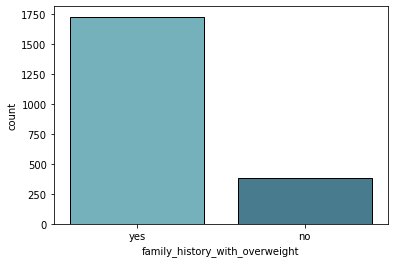

In [9]:
sns.countplot(x= 'family_history_with_overweight', data = Datos, palette="GnBu_d",edgecolor="black")

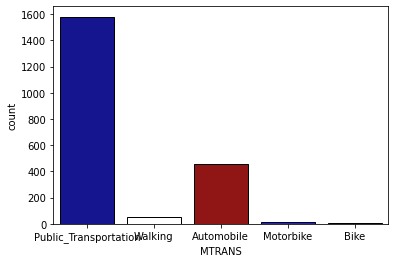

In [10]:
sns.countplot(x= 'MTRANS', data = Datos, palette="flag",edgecolor="black")

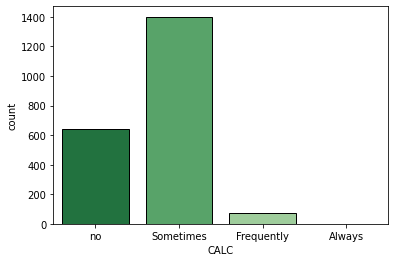

In [11]:
sns.countplot(x= 'CALC', data = Datos, palette="Greens_r",edgecolor="black")

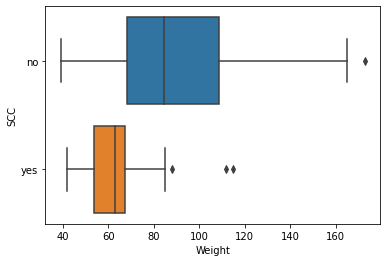

In [18]:
sns.boxplot(x = 'Weight', y = 'SCC', data = Datos)

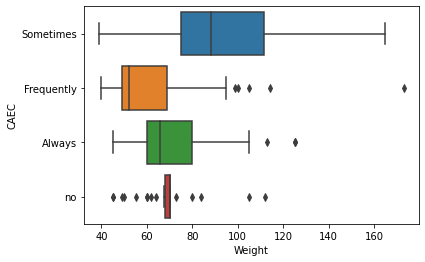

In [20]:
sns.boxplot(x = 'Weight', y = 'CAEC', data = Datos)